In [1]:
import numpy as np
import pandas as pd
#import time dependencies
from datetime import datetime
import time
from datetime import date, timedelta
import datetime
#import statistics dependencies
from scipy.stats import linregress
#import matplotlib dependencies
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
# Import the API key.
from config import EIA_key
import eia
# Import the requests library.
import requests
import matplotlib.ticker as mticker
import matplotlib as mpl

In [2]:
start_date = "2020-01-01"
end_date =  datetime.datetime.now()
# end_date= datetime.datetime.now()


start_date_last = "2020-06-01"
end_date_last =  datetime.datetime.now()

start_date_now = "2020-4-01"
end_date_now =  datetime.datetime.now()

In [3]:
DUCInventory='duc-data.csv'
DUCInventory_df=pd.read_csv(DUCInventory, header=[1]) 
DUCInventory_df=pd.read_csv(DUCInventory, header=[2])
# DUCInventory_df=DUCInventory_df.columns.droplevel(5)
DUCInventory_df.columns = ['Date','Anadarko_Drilled','Anadarko_Completed','Anadarko_DUC','Unnamed: 4','Appalachia_Drilled','Appalachia_Completed','Appalachia_DUC','Unnamed: 8','Bakken_Drilled','Bakken_Completed','Bakken_DUC','Unnamed: 12','Eagle Ford_Drilled','Eagle Ford_Completed', 'Eagle Ford_DUC', 'Unnamed: 16','Haynesville_Drilled','Haynesville_Completed','Haynesville_DUC', 'Unnamed: 20', 'Niobrara_Drilled','Niobrara_Completed', 'Niobrara_DUC','Unnamed: 24','Permian_Drilled','Permian_Completed', 'Permian_DUC','Unnamed: 28', 'DPR_Drilled','DPR_Completed','DPR_DUC']                                         

del DUCInventory_df['Unnamed: 4']
del DUCInventory_df['Unnamed: 8']
del DUCInventory_df['Unnamed: 12']
del DUCInventory_df['Unnamed: 16']
del DUCInventory_df['Unnamed: 20']
del DUCInventory_df['Unnamed: 24']
del DUCInventory_df['Unnamed: 28']

DUCInventory_df=DUCInventory_df.iloc[2:81, ]

In [4]:
#The data was an object, so we need to convert that to an int
#Needed to get rid of the commas so we convt to a string and then to an int
DUCInventory_df['Anadarko_DUC']=pd.to_numeric(DUCInventory_df['Anadarko_DUC'].astype(str).str.replace(',',''), errors='coerce')
DUCInventory_df['Appalachia_DUC']=pd.to_numeric(DUCInventory_df['Appalachia_DUC'].astype(str).str.replace(',',''), errors='coerce')
DUCInventory_df['Bakken_DUC']=pd.to_numeric(DUCInventory_df['Bakken_DUC'].astype(str).str.replace(',',''), errors='coerce')
DUCInventory_df['Eagle Ford_DUC']=pd.to_numeric(DUCInventory_df['Eagle Ford_DUC'].astype(str).str.replace(',',''), errors='coerce')
DUCInventory_df['Haynesville_DUC']=pd.to_numeric(DUCInventory_df['Haynesville_DUC'].astype(str).str.replace(',',''), errors='coerce')
DUCInventory_df['Niobrara_DUC']=pd.to_numeric(DUCInventory_df['Niobrara_DUC'].astype(str).str.replace(',',''), errors='coerce')
DUCInventory_df['Permian_DUC']=pd.to_numeric(DUCInventory_df['Permian_DUC'].astype(str).str.replace(',',''), errors='coerce')
DUCInventory_df['DPR_DUC']=pd.to_numeric(DUCInventory_df['DPR_DUC'].astype(str).str.replace(',',''), errors='coerce')

In [5]:
#access the first column
# data.iloc[:, <column_number>]
DUCInventory_df.iloc[:,0].dtypes

dtype('O')

In [6]:
#if have a date format like Jan-14 for the month and year:
#then you can use pd.to_datetime(df['column'], format=%b-%y)
DUCInventory_df['Date'] = pd.to_datetime(DUCInventory_df["Date"], format='%b-%y')
DUCInventory_date_df = DUCInventory_df[(DUCInventory_df['Date']> start_date) & (DUCInventory_df['Date']< end_date)]
DUCInventory_last_df = DUCInventory_df[(DUCInventory_df['Date']> start_date_last) & (DUCInventory_df['Date']< end_date_last)]


# The dtype of the NumPy record array for the field date is datetime64[D] 
# which means it is a 64-bit np.datetime64 in 'day' units. 
# While this format is more portable, 
# Matplotlib cannot plot this format natively yet. 
# We can plot this data by changing the dates to datetime.date 
# instances instead, which can be achieved by converting to an object array
DUCInventory_date_df['Permian_DUC'] = DUCInventory_date_df['Permian_DUC']

C:\Users\15124\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


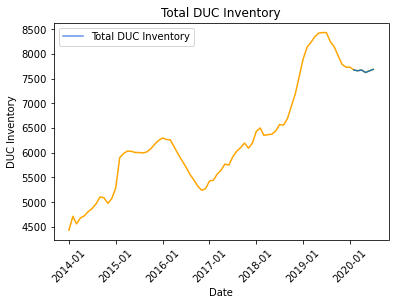

In [7]:
# #This is kind of a cool trick. 
# I plotted The whole thing from 2014 to now in line 7 with DUCInventory_df
# Then I plotted only from 2019 at the bottom with DUCInventory_date_df to get another color
fig, ax=plt.subplots(frameon=False)

ax.set_xlabel('Date')
ax.set_ylabel('DUC Inventory')
ax.plot(DUCInventory_df['Date'],DUCInventory_df['DPR_DUC'], color='orange')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
# ax.tick_params(axis='y', length= 10)
ax.set_title("Total DUC Inventory")
# ax.grid()

# defining legend style and data
blue_line = mlines.Line2D([], [], color='CornflowerBlue', label='Total DUC Inventory')
plt.legend(handles=[blue_line])
plt.savefig("Total DUC Inventory.png", bbox_inches='tight')
plt.plot(DUCInventory_date_df['Date'],DUCInventory_date_df['DPR_DUC'])
# plt.show()

[]

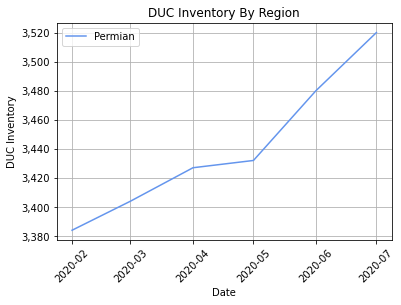

In [8]:
from matplotlib.ticker import FixedLocator, LinearLocator, FormatStrFormatter
# plot just crude prices on one graph
fig, ax=plt.subplots(frameon=False)

ax.set_xlabel('Date')
ax.set_ylabel('DUC Inventory')
ax.plot(DUCInventory_date_df['Date'],DUCInventory_date_df['Permian_DUC'], color='CornflowerBlue')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
# ax.tick_params(axis='y', length= 10)
ax.set_title("DUC Inventory By Region")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid()

# defining legend style and data
blue_line = mlines.Line2D([], [], color='CornflowerBlue', label='Permian')
plt.legend(handles=[blue_line])
plt.savefig("Total DUC Inventory.png", bbox_inches='tight')
plt.plot()
# plt.show()

In [9]:
# DUCInventory_date_df=pd.DataFrame(DUCInventory_date_df)
DUCInventory_date_df.set_index('Date', inplace=True)
DUCInventory_date_df['Anadarko_DUC']

Date
2020-02-01    803
2020-03-01    756
2020-04-01    728
2020-05-01    712
2020-06-01    705
2020-07-01    699
Name: Anadarko_DUC, dtype: int64

In [10]:
DUCInventory_now_df=DUCInventory_date_df[(DUCInventory_date_df.index>start_date_now) & (DUCInventory_date_df.index<end_date_now)]

DUCInventory_now_df.index

DatetimeIndex(['2020-05-01', '2020-06-01', '2020-07-01'], dtype='datetime64[ns]', name='Date', freq=None)

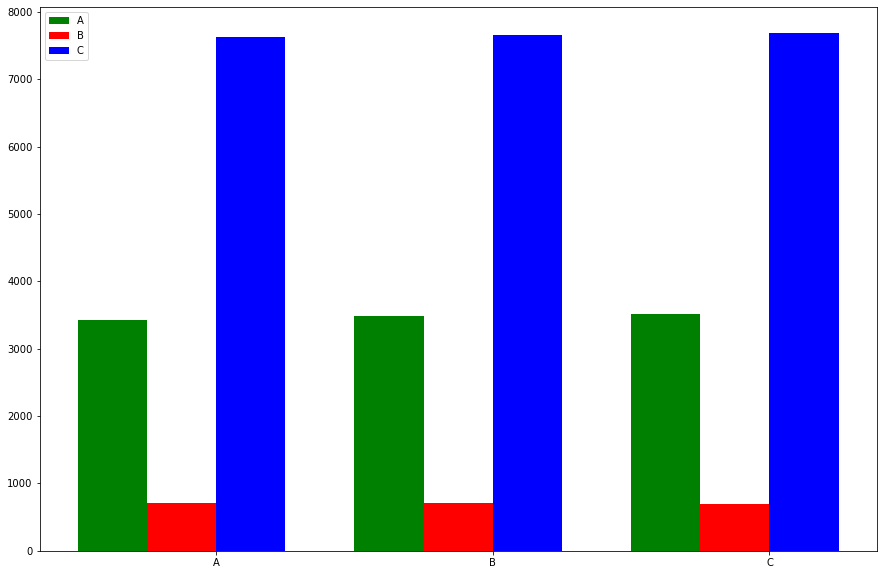

In [16]:
# # plt.subplots() #return tuple that contains figure and axes objects
# fig, ax=plt.subplots() #unpack tuple into variables figure and ax
# ax.plot(x_axis, y_axis)
# # gca() #get current axis


#pandas does not know datetime so turn it into pandas.Timestamp into datetime
f=DUCInventory_now_df.index.to_pydatetime()
figure, ax=plt.subplots(figsize=(15,10))

number_groups=len(['Permian_DUC', 'Anadarko_DUC', 'DPR_DUC'])
numerical=[DUCInventory_now_df['Permian_DUC'],DUCInventory_now_df['Anadarko_DUC'],DUCInventory_now_df['DPR_DUC']]
bin_width=1.0/(number_groups+1)
colors = ['green', 'red', 'blue'] 


for i in range(number_groups):
    ax.bar(x=np.arange(len(['A', 'B', 'C']))+ i*bin_width,
          height=numerical[i],
          width=bin_width,
          color=colors[i])
ax.set_xticks(np.arange(len(['A', 'B', 'C'])) + number_groups/(2*(number_groups+1)))
# number_groups/(2*(number_groups+1)): offset of xticklabel
ax.set_xticklabels(['A', 'B', 'C'])
ax.legend(['A', 'B', 'C'], facecolor='w')
plt.show()






# ax.bar(f,DUCInventory_now_df['Permian_DUC'], color='r', align='edge',width=3)
# ax.set_label('Date')
# ax.set_label('DUC Inventory')
# ax.set_title('DUC Inventory')
# ax.grid()
# plt.savefig('DUC Inventory Bar')


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime
import matplotlib as mpl

# numerical=[DUCInventory_date_df['Bakken_DUC'][80],DUCInventory_date_df['Permian_DUC'][80],DUCInventory_date_df['DPR_DUC'][80]]
# categorical_1=DUCInventory_date_df['Date'][80].strftime('%m/%Y')
# colors=['green', 'red', 'blue']

# number_groups = len(categorical_1) 
# bin_width = 1.0/(number_groups+1)
# fig, ax = plt.subplots(figsize=(6,6))
# for i in range(number_groups):
#     ax.bar(x=np.arange(len(categorical_1)) + i*bin_width, 
#            height=numerical[i],
#            width=bin_width,
#            color=colors[i],
#            align='center')
# ax.set_xticks(np.arange(len(categorical_1)) + number_groups/(2*(number_groups+1)))
# # number_groups/(2*(number_groups+1)): offset of xticklabel

# ax.set_xticklabels(categorical_1)
# ax.legend(categorical_1, facecolor='w')
# plt.show()


fig, ax =plt.subplots(figsize=(15,7))
DUCInventory_date_df.plot(ax=ax)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

barwidth=2
plt.bar(x, align='center', alpha=0.5)
# plt.xticks(DUCInventory_date_df['Date'][80], objects)
plt.ylabel('Usage')
plt.title('Programming language usage')





# x=DUCInventory_df['Date'][80]
# x = date2num(x)
# width = np.min(np.diff(mdates.date2num(x_values)))

# ax = plt.subplot()
# ax.bar(x-0.01, DUCInventory_date_df['Anadarko_DUC'][80], width=0.1, color='b', align='center')
# ax.bar(x, DUCInventory_date_df['Appalachia_DUC'], width=0.1, color='g', align='center')
# ax.bar(x+0.2, DUCInventory_date_df['Bakken_DUC'][80], width=0.1, color='r', align='center')
# ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis_date()
_=plt.xticks(rotation=45)

plt.show()

In [ ]:
fig, ax1=plt.subplots(figsize=(12,8))
barWidth=0.25

# labels =  np.arange(2015,2020)
labels=[DUCInventory_df['Date'][80]]



# Anadarko=plt.bar(labels,DUCInventory_date_df['Anadarko_DUC'][80], color='r', align='edge',width=barWidth)
# Appalachia= plt.bar(labels,DUCInventory_date_df['Appalachia_DUC'][80], color='blue',align='edge', width=barWidth)
# Bakken= plt.bar(labels,DUCInventory_date_df['Bakken_DUC'][80], color='green',align='edge', width=barWidth)
# EagleFord= plt.bar(labels,DUCInventory_date_df['Eagle Ford_DUC'][80], color='orange',align='edge', width=barWidth)
# Haynesville=plt.bar(labels,DUCInventory_date_df['Haynesville_DUC'][80], color='yellow',align='edge', width=barWidth)
# Niobrara=plt.bar(labels,DUCInventory_date_df['Niobrara_DUC'][80], color='g',align='edge', width=barWidth)
# Permian=plt.bar(labels,DUCInventory_date_df['Permian_DUC'][80], color='b',align='edge', width=barWidth)



# bp_dict = plt.bar(labels, list(map(float, scores[0])), align='edge', width=-0.4)
# bp_dict = plt.bar(labels, list(map(float, scores[1])), align='edge', width=0.4)


# ax1=plot.subplot()
ax1.bar(DUCInventory_date_df['Anadarko_DUC'][80], color='r', align='edge',width=barWidth)
ax1.bar(labels,DUCInventory_date_df['Appalachia_DUC'][80], color='blue',align='edge', width=barWidth)
ax1.bar(labels,DUCInventory_date_df['Bakken_DUC'][80], color='green',align='edge', width=barWidth)
ax1.bar(labels,DUCInventory_date_df['Eagle Ford_DUC'][80], color='orange',align='edge', width=barWidth)
ax1.bar(labels,DUCInventory_date_df['Haynesville_DUC'][80], color='yellow',align='edge', width=barWidth)
ax1.bar(labels,DUCInventory_date_df['Niobrara_DUC'][80], color='g',align='edge', width=barWidth)
ax1.bar(labels,DUCInventory_date_df['Permian_DUC'][80], color='b',align='edge', width=barWidth)
ax1.xaxis_date()
ax1.autoscale(tight=True)

plt.xlabel('Basins', fontweight='bold')
plt.ylabel('DUC Inventory', fontweight='bold')
plt.title ("DUC Inventory By Shale Play", fontweight='bold')
# plt.grid()
# plt.legend(loc='upper right')
# plt.legend(fontsize="12", title="Shale Plays")
# lgnd.legendHandles[0]._sizes = [60]
# lgnd.legendHandles[1]._sizes = [60]
# lgnd.legendHandles[2]._sizes = [60]
# lgnd.get_title().set_fontsize(12)


plt.style.use('fivethirtyeight')
plt.show()


In [ ]:
# def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
#     """Draws a bar plot with multiple bars per data point.

#     Parameters
#     ----------
#     ax : matplotlib.pyplot.axis
#         The axis we want to draw our plot on.

#     data: dictionary
#         A dictionary containing the data we want to plot. Keys are the names of the
#         data, the items is a list of the values.

#         Example:
#         data = {
#             "x":[1,2,3],
#             "y":[1,2,3],
#             "z":[1,2,3],
#         }

#     colors : array-like, optional
#         A list of colors which are used for the bars. If None, the colors
#         will be the standard matplotlib color cyle. (default: None)

#     total_width : float, optional, default: 0.8
#         The width of a bar group. 0.8 means that 80% of the x-axis is covered
#         by bars and 20% will be spaces between the bars.

#     single_width: float, optional, default: 1
#         The relative width of a single bar within a group. 1 means the bars
#         will touch eachother within a group, values less than 1 will make
#         these bars thinner.

#     legend: bool, optional, default: True
#         If this is set to true, a legend will be added to the axis.
#     """

#     # Check if colors where provided, otherwhise use the default color cycle
#     if colors is None:
#         colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

#     # Number of bars per group
#     n_bars = len(data)

#     # The width of a single bar
#     bar_width = total_width / n_bars

#     # List containing handles for the drawn bars, used for the legend
#     bars = []

#     # Iterate over all data
#     for i, (name, values) in enumerate(data.items()):
#         # The offset in x direction of that bar
#         x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

#         # Draw a bar for every value of that type
#         for x, y in enumerate(values):
#             bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

#         # Add a handle to the last drawn bar, which we'll need for the legend
#         bars.append(bar[0])

#     # Draw legend if we need
#     if legend:
#         ax.legend(bars, data.keys())

        
# # Anadarko=plt.bar(labels,DUCInventory_date_df['Anadarko_DUC'][80], color='r', align='edge',width=barWidth)
# # Appalachia= plt.bar(labels,DUCInventory_date_df['Appalachia_DUC'][80], color='blue',align='edge', width=barWidth)
# # Bakken= plt.bar(labels,DUCInventory_date_df['Bakken_DUC'][80], color='green',align='edge', width=barWidth)
# # EagleFord= plt.bar(labels,DUCInventory_date_df['Eagle Ford_DUC'][80], color='orange',align='edge', width=barWidth)
# # Haynesville=plt.bar(labels,DUCInventory_date_df['Haynesville_DUC'][80], color='yellow',align='edge', width=barWidth)
# # Niobrara=plt.bar(labels,DUCInventory_date_df['Niobrara_DUC'][80], color='g',align='edge', width=barWidth)
# # Permian=plt.bar(labels,DUCInventory_date_df['Permian_DUC'][80], color='b',align='edge', width=barWidth)      
        

# #     plt.xticks(range(5), ["one", "two", "three", "four", "five"])
        
        
    

# if __name__ == "__main__":
#     # Usage example:
#     data = {
#         DUCInventory_date_df['Anadarko_DUC'][80],
#         DUCInventory_date_df['Appalachia_DUC'][80],
#         DUCInventory_date_df['Bakken_DUC'][80],
#         DUCInventory_date_df['Eagle Ford_DUC'][80],
#         DUCInventory_date_df['Haynesville_DUC'][80],
#         DUCInventory_date_df['Niobrara_DUC'][80],
#         DUCInventory_date_df['Permian_DUC'][80],
#     }

#     fig, ax = plt.subplots()
#     bar_plot(ax, data, total_width=.8, single_width=.9)
#     plt.show()

In [ ]:
# anadarko_DUC['']=pd.to_numeric(DUCInventory_df['Anadarko_DUC'].astype(str).str.replace(',',''), errors='coerce')

In [ ]:

# plt.yticks(rotation=90)
#to change the number of ticks, np.arrange(start,stop, step)
# y_ticks = np.arange(1600, 4000, 10)
# plt.yticks(y_ticks)



# ax = plt.gca().invert_yaxis()

# ymin, ymax = ax.get_ylim()
# custom_ticks = np.linspace(ymin, ymax, 10, dtype=int)
# ax.set_yticks(custom_ticks)
# ax.set_yticklabels(custom_ticks)
# ax.yaxis.set_major_locator(plt.MaxNLocator(5))


# ylims = ax1.get_ylim()
# ymajorlocator = FixedLocator(ylims)
# ax.yaxis.set_major_locator(ymajorlocator)
# ax.yaxis.set_minor_locator(LinearLocator(10))
# ymajorformatter = FormatStrFormatter('%.2f')
# ax.yaxis.set_major_formatter(ymajorformatter)


# ylims = ax.get_ylim()
# ax.set_yticks(ylims)



# ax.get_xaxis().get_major_formatter().set_useOffset(False)

